In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

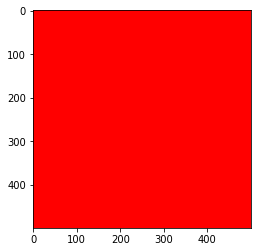

(500, 500, 3)


In [2]:
img = cv2.imread('utils/redsquare.png')      # Load Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )  # Convert to RGB

plt.imshow(img)
plt.show()
print(img.shape)

In [3]:
R,G,B = img[1,1,0],img[1,1,1],img[1,1,2]
RGB   = np.array([R,G,B],dtype=np.uint8)

In [45]:
def Regularize(RGB):
    return RGB/255

def RGB2HSV(RGB):
    R,G,B = RGB
    Max = np.max(RGB)
    Min = np.min(RGB)
    V = Max
    Delta = Max - Min
    S = Delta/Max
    if Delta == 0:
        H=0
        print("H is undefined")
    else:
        if Max == R and Min == B:
            H = 1/6*(G-B)/Delta

        elif Max == G and Min == B:
            H = 1/6*(1+(R-B)/Delta)

        elif Max == G and Min == R: 
            H = 1/6*(2+(B-R)/Delta)

        elif Max == B and Min == R:
            H = 1/6*(3+(G-R)/Delta)

        elif Max == B and Min == G:
            H = 1/6*(4+(R-G)/Delta)
            
        elif Max == B and Min == G:
            H = 1/6*(5+(B-G)/Delta)
            
    return np.array([H,S,V])


def RGB2YIQ(RGB):
    YIQTranformation = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    RGB = RGB.reshape(-1,1)
    
    return (YIQTranformation.dot(RGB)).flatten()

def YIQ2RGB(YIQ):
    RGBTranformation = np.array([[1,0.9563,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    YIQ = YIQ.reshape(-1,1)
    return np.round((RGBTranformation.dot(YIQ)).flatten(),decimals=2)

def RGB2XYZ(RGB):
    XYZTranformation = np.array([[0.5767309,0.1855540,0.1881852],[0.29273769,0.6273491,0.0752741],[0.0270343,0.0706872,0.9911085]])
    XYZ = (RGB**2.2).reshape(-1,1)
    return (XYZTranformation@XYZ).flatten()

def RGB2LAB(RGB):
    XYZ = RGB2XYZ(RGB)
    XYZn = XYZ/np.array([0.9505,1,1.0888])

    P = np.zeros_like(XYZn)
    for pi in range(0,P.__len__()):
        if XYZn[pi] > 0.008856:
            P[pi] = XYZn[pi]**(1/3)
        elif XYZn[pi] < 0.008856:
             P[pi] = 7.787*XYZn[pi] + 16/116

    LAB = np.array([116*P[1]-16,500*(P[0]-P[1]),200*(P[1]-P[2])])   
    
    return LAB


def RGB2HSI(RGB):
    R,G,B = RGB
    eps = 2.2204E-16
    num = 0.5*((R - G)+(R - B))
    den = np.sqrt((R - G)**2 + (R - B)*(G - B))
    angle = np.arccos(num/(den + eps))
    if B <=G:
        H = angle
    else:
        H = 2*pi -  angle
    
    H = H/(2*np.pi)
    num = np.min(RGB)
    den = R + G + B
    
    if den == 0:
        den = eps
        
    S = 1 - 3*num/den
    
    if S == 0:
        H = eps
    
    
    I = (R + G + B)/3
    
    return np.array([H,S,I])
    
    
def GetColors(vec):
    HSV  = RGB2HSV(vec)
    print(f"HSV: {HSV}")
    YIQ  = RGB2YIQ(vec)
    print(f"YIQ: {YIQ}")
    XYZ = RGB2XYZ(vec)
    print(f"XYZ: {XYZ}")
    LAB = RGB2LAB(vec)
    print(f"LAB: {LAB}")
    HSI = RGB2HSI(vec)
    print(f"HSI: {HSI}")


In [46]:
vec  = np.array([0.15,0.72,0.20])
GetColors(vec)

HSV: [0.34795322 0.79166667 0.72      ]
YIQ: [ 0.49029    -0.17250136 -0.28232012]
XYZ: [0.10440941 0.3112267  0.0634637 ]
LAB: [ 62.61105113 -99.3809985   57.99094709]
HSI: [0.34595198 0.57943925 0.35666667]
